In [2]:
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
import matplotlib.pyplot as plt

In [29]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
processor = BlipProcessor.from_pretrained("noamrot/FuseCap")
model = BlipForConditionalGeneration.from_pretrained("noamrot/FuseCap").to(device)

img_url = '/home/user/Meet_Patel/new1/DataToHuggingFace/data/test11.jpg'
img = Image.open(img_url)
raw_image = img.convert('RGB')


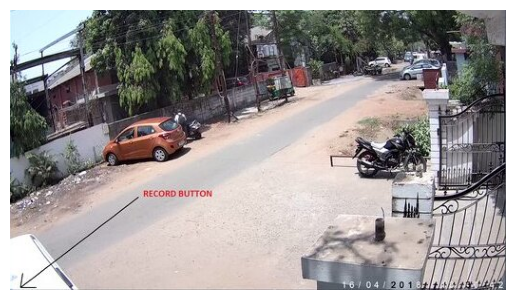

'a picture of a red car parked on the side of the road surrounded by green trees and a metal fence, with a white building in the background'

In [30]:
text = "a picture of "
inputs = processor(raw_image, text, return_tensors="pt").to(device)

out = model.generate(**inputs, num_beams = 3)
generated_text = processor.decode(out[0], skip_special_tokens=True)

plt.imshow(raw_image)
plt.axis('off')
plt.show()
generated_text

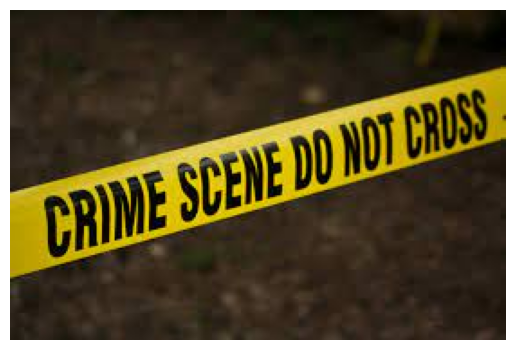

'the image shows a black letter on the left side of the image, with a warning sign on the right side of the image that reads no trespassing, no trespassing, no'

In [28]:
# inputs = processor(raw_image, return_tensors="pt").to(device)
# out = model.generate(**inputs)
# generated_text = processor.decode(out[0], skip_special_tokens = True)
# generated_text

plt.imshow(raw_image)
plt.axis('off')
plt.show()

inputs = processor(raw_image, return_tensors="pt").to(device)
out = model.generate(**inputs, num_beams = 10, max_length = 200)
generated_text3 = processor.decode(out[0], skip_special_tokens = True)
generated_text3

In [69]:
from nltk import pos_tag, word_tokenize, ne_chunk

def extract_noun_phrases(caption):
    # Tokenize the caption
    tokens = word_tokenize(caption)
    
    # Perform part-of-speech tagging
    tagged = pos_tag(tokens)

    # Function to extract noun phrases
    def get_noun_phrases(tagged_tokens):
        noun_phrases = []
        current_np = []

        for word, tag in tagged_tokens:
            # Check if the tag indicates a noun or adjective
            if tag.startswith('NN') or tag.startswith('JJ'):
                current_np.append(word)
            else:
                if current_np:
                    noun_phrases.append(' '.join(current_np))
                    current_np = []
        
        # Catch any remaining noun phrase
        if current_np:
            noun_phrases.append(' '.join(current_np))

        return noun_phrases

    # Extract noun phrases
    noun_phrases = get_noun_phrases(tagged)

    # Filter out duplicates and sort
    unique_noun_phrases = list(set(noun_phrases))
    unique_noun_phrases.sort()

    return unique_noun_phrases

tokens1 = extract_noun_phrases(generated_text)
print(tokens1)


['background', 'blue building', 'building', 'glass', 'green tree', 'picture', 'road', 'several windows', 'side', 'white', 'white car']


In [70]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(generated_text)
objects = [chunk.text for chunk in doc.noun_chunks]
unique_objects = list(set(objects))
unique_objects

['a white and blue building',
 'a green tree',
 'a picture',
 'a glass',
 'the road',
 'the side',
 'the building',
 'several windows',
 'the background',
 'a white car']

In [71]:
import spacy

# Loading the English model
nlp = spacy.load("en_core_web_sm")
doc = nlp(generated_text)
objects = []
for chunk in doc.noun_chunks:
    # Remove the article from the beginning of the chunk if it exists
    phrase = ' '.join(token.text for token in chunk if token.text.lower() not in ('a', 'an', 'the', 'picture'))
    
    # Only add non-empty phrases
    if phrase.strip():  # Check if the phrase is not empty
        objects.append(phrase.strip())

# Filter out duplicates
unique_objects = list(set(objects))
unique_objects

['white car',
 'building',
 'green tree',
 'background',
 'side',
 'road',
 'white and blue building',
 'several windows',
 'glass']

In [40]:
import pytesseract
from deep_translator import GoogleTranslator

# tesseractlang(translatorlang)
# chi_tra(zhTW) and chi_sim(zh-CN)

def extract_text_from_image(img):
    # ocr_text = pytesseract.image_to_string(img, lang='chi_sim')
    ocr_text = pytesseract.image_to_string(img, lang='eng')
    # cleaned_text = ' '.join(ocr_text.split())
    return ocr_text

def translate_text(text, dest_language='en'):
    translated = GoogleTranslator(source='zh-CN', target=dest_language).translate(text)
    return translated

chinese_text = extract_text_from_image(img)
print("Extracted Text:", chinese_text)

# # Translate the extracted text
# translated_text = translate_text(chinese_text, dest_language='en')
# print("Translated Text:", translated_text)


Extracted Text:  

Brino Auto 04



In [157]:
#trial for chinese text extaction

import pytesseract
from PIL import Image
from deep_translator import GoogleTranslator
# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

def extract_text_from_image(image_path):
    # Load the image
    image = Image.open(image_path)
    
    # Use Tesseract to do OCR on the image
    extracted_text = pytesseract.image_to_string(image, lang='chi_sim')  # Use 'chi_sim' for Simplified Chinese
    return extracted_text

def translate_text(text, dest_language='en'):
    # Translate the text using deep_translator
    # zh-CN / zh-TW
    translated = GoogleTranslator(source='zh-TW', target=dest_language).translate(text)
    return translated

chinese_text = extract_text_from_image(img_url)
print("Extracted Text:", chinese_text)

# Translate the extracted text
translated_text = translate_text(chinese_text, dest_language='en')
print("Translated Text:", translated_text)

Extracted Text:  

Translated Text: 


In [2]:
# Easy OCR

import easyocr
import cv2

def extract_text(image_path):
    # Create an EasyOCR reader
    reader = easyocr.Reader(lang_list=['en'])  # Specify languages: English and Simplified Chinese
    # Read the image
    image = cv2.imread(image_path)
    # Perform OCR
    results = reader.readtext(image)
    
    # Extract and return text
    extracted_text = " ".join([result[1] for result in results])
    return extracted_text

if __name__ == "__main__":
    image_path = 'test2.jpg'  # Replace with your image path
    text = extract_text(image_path)
    print("Extracted Text:", text)


/home/user/new1/.venv/lib/python3.12/site-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(traine

Extracted Text: LSHH Qutobe ChANN


In [51]:
# paddlerocr Better

from paddleocr import PaddleOCR
from deep_translator import GoogleTranslator

def extract_text(image_path):
    # Create a PaddleOCR instance
    ocr = PaddleOCR(use_angle_cls=True, lang='ch')  # Use Chinese language
    # Perform OCR
    results = ocr.ocr(image_path, cls=True)
    
    # Extract and return text
    extracted_text = ""
    for result in results:
        for line in result:
            extracted_text += line[1][0] + " "  # Append recognized text
    return extracted_text.strip()

def translate_text(text, dest_language='en'):
    translated = GoogleTranslator(source='zh-CN', target=dest_language).translate(text)
    return translated

if __name__ == "__main__":
    image_path = 'test8.jpg'  # Replace with your image path
    text = extract_text(image_path)
    # text = translate_text(text, 'en')
    print("Extracted Text:", text)


[2024/08/07 12:33:48] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/user/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/user/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length

In [3]:
from paddleocr import PaddleOCR
from deep_translator import GoogleTranslator

def extract_text_with_positions(image_path):
    # Create a PaddleOCR instance
    ocr = PaddleOCR(use_angle_cls=True, lang='ch')  # Use Chinese language
    # Perform OCR
    results = ocr.ocr(image_path, cls=True)
    
    # Define a list to hold the concatenated text with position tokens
    texts_with_positions = []
    
    # Extract and categorize text based on position
    for result in results:
        for line in result:
            text = line[1][0]
            # Get the coordinates of the bounding box
            # coordinates = line[0]
            # x_coords = [point[0] for point in coordinates]
            # y_coords = [point[1] for point in coordinates]
            # avg_x = sum(x_coords) / len(x_coords)
            # avg_y = sum(y_coords) / len(y_coords)
            
            # Determine position token based on coordinates
            # if avg_x > 0.5 and avg_y < 0.5:
            #     position_token = "upper_right"
            # elif avg_x < 0.5 and avg_y < 0.5:
            #     position_token = "upper_left"
            # elif avg_x > 0.5 and avg_y > 0.5:
            #     position_token = "bottom_right"
            # elif avg_x < 0.5 and avg_y > 0.5:
            #     position_token = "bottom_left"
            # else:
            #     position_token = "unknown"
            # texts_with_positions.append(f"{position_token}: {text}")
            
            texts_with_positions.append(text)
    
    return texts_with_positions

def translate_text(text, dest_language='en'):
    translated = GoogleTranslator(source='zh-CN', target=dest_language).translate(text)
    return translated

if __name__ == "__main__":
    image_path = 'test6.jpg'  # Replace with your image path
    texts_with_positions = extract_text_with_positions(image_path)
    
    # Example of translating each concatenated text
    translated_texts_with_positions = [translate_text(text) for text in texts_with_positions]

    print("Extracted Texts with Positions:", texts_with_positions)
    print("Translated Texts with Positions:", translated_texts_with_positions)


[2024/08/09 12:57:52] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/user/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/user/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length

In [28]:
from datetime import datetime
import re

def extract_date_and_time(tokens):
    date_token = None
    time_token = None

    for token in tokens:
        # Extract date using regex and try to match the format 'YYYY-MM-DD'
        date_match = re.search(r'\b(\d{4}-\d{2}-\d{2})\b', token)
        if date_match:
            try:
                date_token = datetime.strptime(date_match.group(1), '%Y-%m-%d').strftime('%Y-%m-%d')
            except ValueError:
                continue

        # Extract time using regex and try to match the format 'HH:MM:SS'
        time_match = re.search(r'\b(\d{2}:\d{2}:\d{2})\b', token)
        if time_match:
            try:
                time_token = datetime.strptime(time_match.group(1), '%H:%M:%S').strftime('%H:%M:%S')
            except ValueError:
                continue

    return date_token, time_token

def expand_date(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    return [
        date_str,
        date_obj.strftime('%d %B %Y'),
        date_obj.strftime('%d %B').lower(),
        date_obj.strftime('%d-%m-%Y')
    ]

def expand_time(time_str):
    return [time_str]

def process_list(input_list):
    # Extract date and time tokens
    date_token, time_token = extract_date_and_time(input_list)

    # Initialize result list with original tokens
    result = input_list.copy()

    # Expand date and time
    if date_token:
        result.extend(expand_date(date_token))
    if time_token:
        result.extend(expand_time(time_token))

    return result

# Example usage
input_list = ['AX0N B0DY 3 X60A4689Z', '2024-02-01 10:11:32 -0500']
output_list = process_list(input_list)
print("Output list:", output_list)


Output list: ['AX0N B0DY 3 X60A4689Z', '2024-02-01 10:11:32 -0500', '2024-02-01', '01 February 2024', '01 february', '01-02-2024', '10:11:32']


In [27]:
import spacy

# Load the English model
nlp = spacy.load("en_core_web_sm")

def pos_tagging(sentence):
    # Process the sentence
    doc = nlp(sentence)
    
    # Create a list to hold the tokens and their POS tags
    pos_tags = [(token.text, token.pos_) for token in doc]
    
    return pos_tags

# Example usage
sentence = "a picture of a white car is parked on the side of the road next to a white and blue building, with a green tree in the background the building has several windows, including a glass"
pos_tags = pos_tagging(sentence)

# Print the results
for word, pos in pos_tags:
    print(f"{word}: {pos}")


a: DET
picture: NOUN
of: ADP
a: DET
white: ADJ
car: NOUN
is: AUX
parked: VERB
on: ADP
the: DET
side: NOUN
of: ADP
the: DET
road: NOUN
next: ADV
to: ADP
a: DET
white: ADJ
and: CCONJ
blue: ADJ
building: NOUN
,: PUNCT
with: ADP
a: DET
green: ADJ
tree: NOUN
in: ADP
the: DET
background: NOUN
the: DET
building: NOUN
has: VERB
several: ADJ
windows: NOUN
,: PUNCT
including: VERB
a: DET
glass: NOUN
